In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

(112, 35)


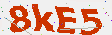

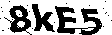

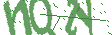

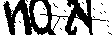

In [2]:
from captchagen import get_captcha_image, generate_captcha, preprocess_image
# 示例使用
image, cookie = get_captcha_image()

# image info
print(image.size)
# show image
from IPython.display import display

display(image)
display(preprocess_image(image))

image, captcha = generate_captcha()
display(image)
display(preprocess_image(image))

In [18]:
import torch
from models.cnn import CaptchaOCR
model = CaptchaOCR().to(device)
import os

if os.path.exists("captcha_ocr.pth"):
    model.load_state_dict(torch.load("captcha_ocr.pth"))

In [19]:
from models.transformer import CaptchaSolverWithTransformer
model = CaptchaSolverWithTransformer().to(device)
import os

if os.path.exists("captcha_transformer.pth"):
    model.load_state_dict(torch.load("captcha_transformer.pth"))

/home/caoziguang/miniconda3/envs/captcha/lib/python3.11/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/tmp/ipykernel_4183378/265152414.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to

In [13]:
from models.cnn_transformer import CaptchaSolverWithCNNTransformer

model = CaptchaSolverWithCNNTransformer().to(device)
import os

# if os.path.exists("captcha_cnn_transformer.pth"):
#     model.load_state_dict(torch.load("captcha_cnn_transformer.pth"))

/home/cao/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [33]:
from torch.utils.data import DataLoader
from dataset import CaptchaDataset

dataset = CaptchaDataset(50000)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

test_dataset = CaptchaDataset(1000)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)

KeyboardInterrupt: 

In [31]:
# train model
import torch
import torch.optim as optim
from tqdm import tqdm

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

for epoch in range(20):
    for x, y in tqdm(dataloader):
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = criterion(y_pred.view(-1, 62), y.argmax(dim=-1).view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    accuracy = (y_pred.argmax(dim=-1) == y.argmax(dim=-1)).float().mean()
    tqdm.write(f"epoch: {epoch}, loss: {loss.item()}, accuracy: {accuracy.item()}")

    with torch.no_grad():
        total_loss = 0
        total_accuracy = 0
        for x, y in test_dataloader:
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            total_loss += criterion(y_pred.view(-1, 62), y.argmax(dim=-1).view(-1)).item()
            total_accuracy += (y_pred.argmax(dim=-1) == y.argmax(dim=-1)).float().mean().item()
        total_loss /= len(test_dataloader)
        tqdm.write(f"test loss: {total_loss}, test accuracy: {total_accuracy / len(test_dataloader)}")
    
    # wait for jupter input
    input()

100%|██████████| 1562/1562 [00:02<00:00, 575.97it/s]


epoch: 0, loss: 0.6325377821922302, accuracy: 0.8125
test loss: 0.954074663500632, test accuracy: 0.7149697580645161


100%|██████████| 1562/1562 [00:02<00:00, 588.91it/s]


epoch: 1, loss: 0.306267112493515, accuracy: 0.90625
test loss: 1.052271431492221, test accuracy: 0.7001008064516129


100%|██████████| 1562/1562 [00:02<00:00, 590.02it/s]


epoch: 2, loss: 0.34629663825035095, accuracy: 0.890625
test loss: 1.2006684137928871, test accuracy: 0.7053931451612904


100%|██████████| 1562/1562 [00:02<00:00, 590.38it/s]


epoch: 3, loss: 0.36602410674095154, accuracy: 0.8515625
test loss: 1.3162358307069348, test accuracy: 0.6915322580645161


100%|██████████| 1562/1562 [00:02<00:00, 589.66it/s]


epoch: 4, loss: 0.5824033617973328, accuracy: 0.8203125
test loss: 1.573524244369999, test accuracy: 0.6927923387096774


100%|██████████| 1562/1562 [00:02<00:00, 589.51it/s]


epoch: 5, loss: 0.12508076429367065, accuracy: 0.953125
test loss: 1.8042316590586016, test accuracy: 0.6832157258064516


100%|██████████| 1562/1562 [00:02<00:00, 589.81it/s]


epoch: 6, loss: 0.3061000406742096, accuracy: 0.90625
test loss: 2.0633817718875025, test accuracy: 0.6817036290322581


100%|██████████| 1562/1562 [00:02<00:00, 589.76it/s]


epoch: 7, loss: 0.28069981932640076, accuracy: 0.9140625
test loss: 2.2765663669955347, test accuracy: 0.6804435483870968


100%|██████████| 1562/1562 [00:02<00:00, 593.17it/s]


epoch: 8, loss: 0.3859255909919739, accuracy: 0.8671875
test loss: 2.3766634348900086, test accuracy: 0.6844758064516129


100%|██████████| 1562/1562 [00:02<00:00, 589.52it/s]


epoch: 9, loss: 0.2510591149330139, accuracy: 0.9375
test loss: 2.612855995855024, test accuracy: 0.6849798387096774


100%|██████████| 1562/1562 [00:02<00:00, 588.78it/s]


epoch: 10, loss: 0.29763323068618774, accuracy: 0.9140625
test loss: 2.7402549482161, test accuracy: 0.6703629032258065


100%|██████████| 1562/1562 [00:02<00:00, 588.38it/s]


epoch: 11, loss: 0.3556354343891144, accuracy: 0.9140625
test loss: 2.6358352438096078, test accuracy: 0.6920362903225806


100%|██████████| 1562/1562 [00:02<00:00, 586.92it/s]


epoch: 12, loss: 0.4195792078971863, accuracy: 0.8828125
test loss: 2.970191870966265, test accuracy: 0.6733870967741935


100%|██████████| 1562/1562 [00:02<00:00, 587.05it/s]


epoch: 13, loss: 0.2209659069776535, accuracy: 0.9453125
test loss: 2.8815025168080486, test accuracy: 0.6804435483870968


100%|██████████| 1562/1562 [00:02<00:00, 587.56it/s]


epoch: 14, loss: 0.2442038208246231, accuracy: 0.9140625
test loss: 3.029801376404301, test accuracy: 0.6759072580645161


100%|██████████| 1562/1562 [00:02<00:00, 588.35it/s]


epoch: 15, loss: 0.42995205521583557, accuracy: 0.890625
test loss: 3.114359294214556, test accuracy: 0.6736391129032258


100%|██████████| 1562/1562 [00:02<00:00, 587.11it/s]


epoch: 16, loss: 0.21698400378227234, accuracy: 0.9453125
test loss: 3.085419131863502, test accuracy: 0.672883064516129


100%|██████████| 1562/1562 [00:02<00:00, 586.52it/s]


epoch: 17, loss: 0.05019070580601692, accuracy: 0.9765625
test loss: 3.180342758855512, test accuracy: 0.6736391129032258


 65%|██████▍   | 1011/1562 [00:01<00:00, 585.69it/s]


KeyboardInterrupt: 

In [30]:
# eval model
from dataset import CaptchaDataset
from torch.utils.data import DataLoader
from tqdm import tqdm

test_dataset = CaptchaDataset(1000)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True, drop_last=True)

with torch.no_grad():
    total_loss = 0
    total_accuracy = 0
    for x, y in tqdm(test_dataloader):
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        total_loss += criterion(y_pred.view(-1, 62), y.argmax(dim=-1).view(-1)).item()
        total_accuracy += (y_pred.argmax(dim=-1) == y.argmax(dim=-1)).float().mean().item()
    total_loss /= len(test_dataloader)
    print(f"Loss: {total_loss/len(test_dataloader)} Accuracy: {total_accuracy/len(test_dataloader)}")

100%|██████████| 31/31 [00:00<00:00, 718.47it/s]

Loss: 0.030414240355298126 Accuracy: 0.7046370967741935


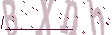

Bxnb


[('BXDh', 0.9859749674797058),
 ('BXDb', 0.010144625790417194),
 ('BXOh', 0.0038344592321664095),
 ('BXOb', 3.94524795410689e-05),
 ('BXnh', 6.513674179586815e-06),
 ('BXnb', 6.701873189740581e-08),
 ('BxDh', 2.1597359456393406e-09),
 ('BXDd', 5.713416406649685e-10),
 ('8XDh', 9.734873324118709e-11),
 ('BXIh', 7.540914420678391e-11)]

In [20]:
from torchvision import transforms
# test model
image, captcha = generate_captcha()
display(image)
print(captcha)
image = preprocess_image(image)
x = transforms.ToTensor()(image).unsqueeze(0).to(device)
y_pred = model.predict_all_possible(x)
y_pred

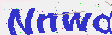

[('GFkZ', 0.8878445029258728),
 ('GhkZ', 0.059320081025362015),
 ('GkkZ', 0.05191189423203468),
 ('dFkZ', 0.00033583867480047047),
 ('GikZ', 0.00015890544455032796),
 ('GvkZ', 0.00015631777932867408),
 ('GHkZ', 7.600496610393748e-05),
 ('GEkZ', 4.242207432980649e-05),
 ('GFkd', 4.149758387939073e-05),
 ('GFWZ', 3.1407176720676944e-05)]

In [23]:
# test model on real captcha
image, cookie = get_captcha_image()
display(image)

image = preprocess_image(image)
x = transforms.ToTensor()(image).unsqueeze(0).to(device)
y_pred = model.predict_all_possible(x)
y_pred

In [63]:
# save model
if model.__class__.__name__ == "CaptchaOCR":
    torch.save(model.state_dict(), "captcha_ocr.pth")
elif model.__class__.__name__ == "CaptchaSolverWithTransformer":
    torch.save(model.state_dict(), "captcha_transformer.pth")